# NOTEBOOK FOR LC CASE STUDY

>>### DATA LOADING AND SETUP

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#load csv data into dataframe
loan_df=pd.read_csv('loan.csv')

C:\Users\mohit\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


READ CSV DATA INTO DATAFRAME

>>### DATA CLEANING

1. REMOVE EMPTY ROWS AND COLUMNS

In [2]:
loan_df.dropna(axis=1,how='all',inplace=True)
loan_df.dropna(axis=0,how='all',inplace=True)

2. REMOVE COLUMNS THAT ARE IRRELEVANT FOR CASE STUDY

In [3]:
loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'initial_list_status', 'out_prncp',
 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 
 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 
 'pub_rec_bankruptcies', 'tax_liens', 'title', 'zip_code', 'pymnt_plan', 'url', 'desc', 'verification_status', 
 'issue_d', 'emp_title', 'emp_length', 'id', 'member_id'],axis=1,inplace=True)

3. FORMATTING AND STANDARDISING DATA

In [4]:
#term column has two values ['36 months','60 months']
#remove months and convert column to int
#rename term to term(in months)
loan_df['term']=loan_df['term'].map(lambda x: x.split()[0])
loan_df['term']=loan_df['term'].astype('int')
loan_df.rename(columns={'term':'term(in months)'},inplace=True)

#remove percentage symbol from int_rate column
#convert the column to float
#rename to int_rate(percentage)
loan_df['int_rate']=loan_df['int_rate'].map(lambda x: x[:-1]).astype('float')
loan_df.rename(columns={'int_rate':'int_rate(percentage)'},inplace=True)

#remove percentage symbol from revol_util column
#convert the column to float
#rename to revol_util(percentage)
loan_df['revol_util']=loan_df['revol_util'].dropna().map(lambda x: x[:-1]).astype('float')
loan_df.rename(columns={'revol_util':'revol_util(percentage)'},inplace=True)

>> ### UNIVARIATE ANAYSIS

1. DATA DESCRIPTION

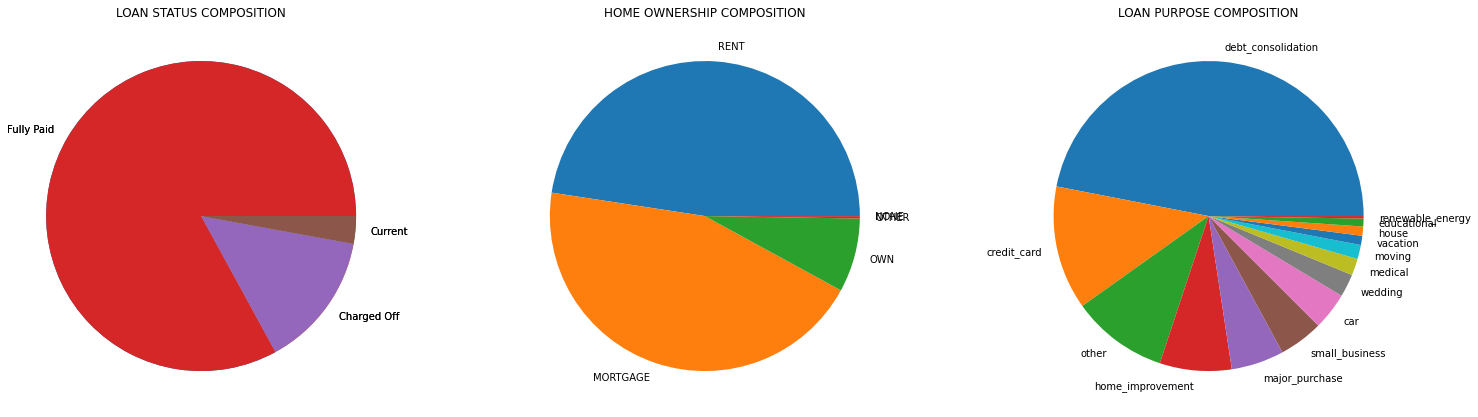

In [5]:
# Plot general composition stats
plt.figure(figsize=(25,10))
grid = plt.GridSpec(1,3,wspace=0.3,hspace=0.3)

plt.subplot(grid[0,0])
loan_status_composition = loan_df['loan_status'].value_counts()
plt.pie(loan_status_composition.values,labels=loan_status_composition.index)
plt.title('LOAN STATUS COMPOSITION')

plt.subplot(grid[0,0])
loan_status_composition = loan_df['loan_status'].value_counts()
plt.pie(loan_status_composition.values,labels=loan_status_composition.index)
plt.title('LOAN STATUS COMPOSITION')

plt.subplot(grid[0,1])
loan_home_own_composition = loan_df['home_ownership'].value_counts()
plt.pie(loan_home_own_composition.values,labels=loan_home_own_composition.index)
plt.title('HOME OWNERSHIP COMPOSITION')

plt.subplot(grid[0,2])
loan_purpose_composition = loan_df['purpose'].value_counts()
plt.pie(loan_purpose_composition.values,labels=loan_purpose_composition.index)
plt.title('LOAN PURPOSE COMPOSITION')

plt.show()


2. SEGMENTED UNIVARIATE ANALYSIS

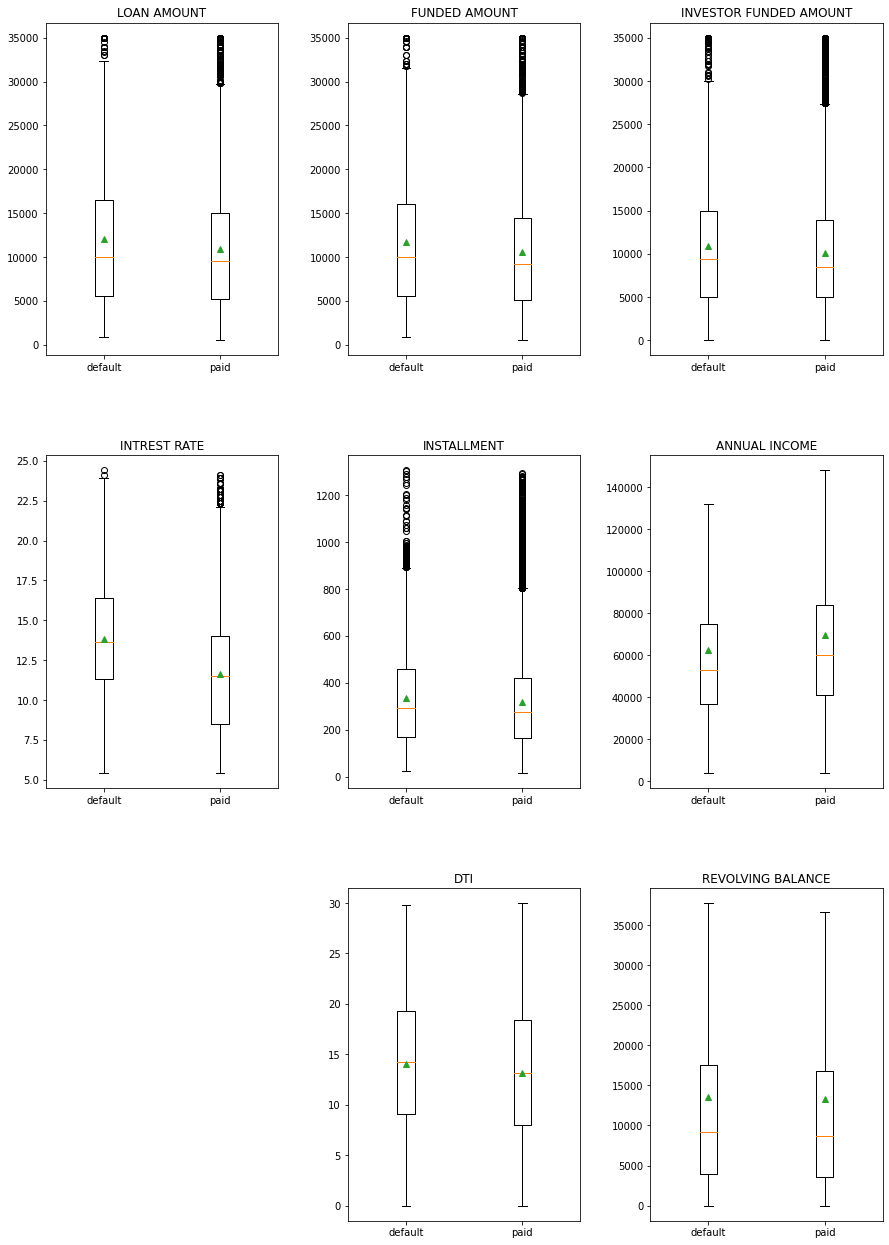

In [6]:
# PLOT FIVE SUMMARY AGAINST LOAN STATUS CATEGORY

plt.figure(figsize=(15,30))
grid = plt.GridSpec(4,3,wspace=0.3,hspace=0.3)

loan_default_df = loan_df[loan_df['loan_status']=='Charged Off']
loan_paid_df = loan_df[loan_df['loan_status']=='Fully Paid']

plt.subplot(grid[0,0])
plt.boxplot((loan_default_df['loan_amnt'],loan_paid_df['loan_amnt']),showmeans=True,labels=['default','paid'])
plt.title('LOAN AMOUNT')

plt.subplot(grid[0,1])
plt.boxplot((loan_default_df['funded_amnt'],loan_paid_df['funded_amnt']),showmeans=True,labels=['default','paid'])
plt.title('FUNDED AMOUNT')

plt.subplot(grid[0,2])
plt.boxplot((loan_default_df['funded_amnt_inv'],loan_paid_df['funded_amnt_inv']),showmeans=True,labels=['default','paid'])
plt.title('INVESTOR FUNDED AMOUNT')

plt.subplot(grid[1,0])
plt.boxplot((loan_default_df['int_rate(percentage)'],loan_paid_df['int_rate(percentage)']),showmeans=True,labels=['default','paid'])
plt.title('INTREST RATE')

plt.subplot(grid[1,1])
plt.boxplot((loan_default_df['installment'],loan_paid_df['installment']),showmeans=True,labels=['default','paid'])
plt.title('INSTALLMENT')

plt.subplot(grid[1,2])
plt.boxplot((loan_default_df['annual_inc'],loan_paid_df['annual_inc']),showmeans=True,labels=['default','paid'],showfliers=False)
plt.title('ANNUAL INCOME')

plt.subplot(grid[2,1])
plt.boxplot((loan_default_df['dti'],loan_paid_df['dti']),showmeans=True,labels=['default','paid'])
plt.title('DTI')

plt.subplot(grid[2,2])
plt.boxplot((loan_default_df['revol_bal'],loan_paid_df['revol_bal']),showmeans=True,labels=['default','paid'],showfliers=False)
plt.title('REVOLVING BALANCE')

plt.show()

            Above Analysis shows that higher intrest has higher default

>>### BIVARIATE ANALYSIS

1. CATEGORICAL ATTRIBUTES

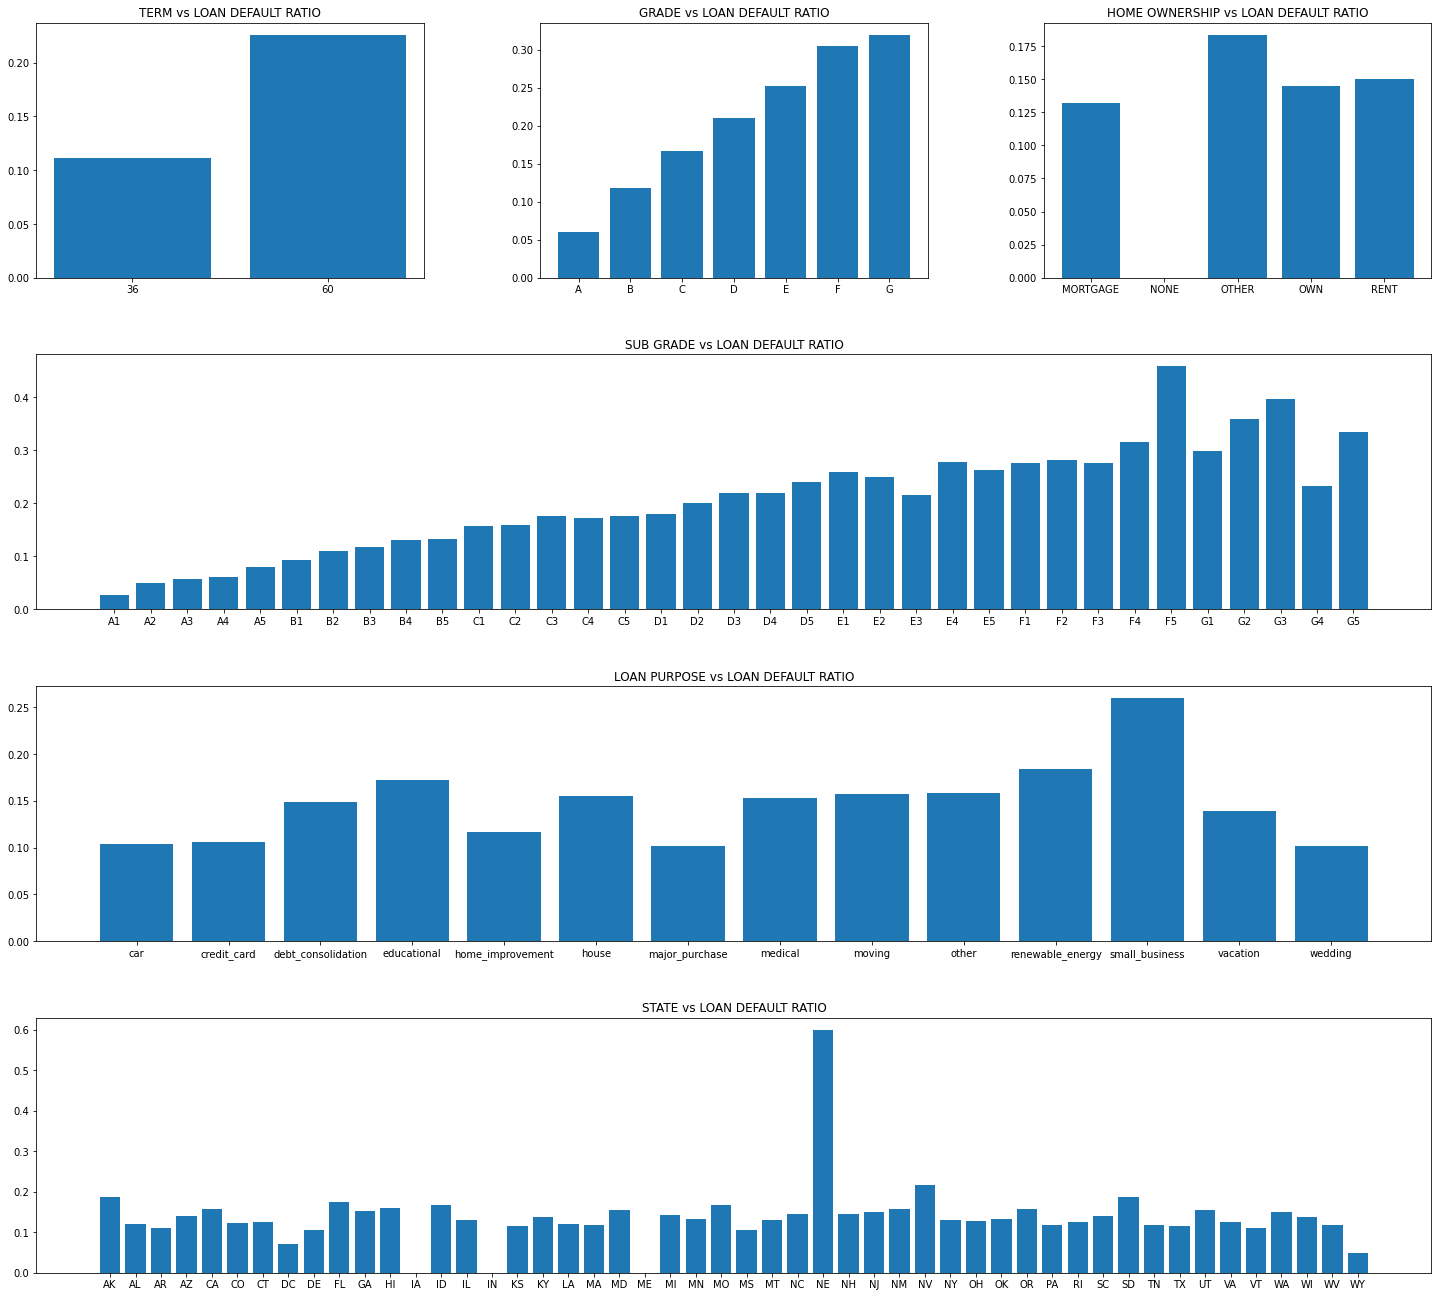

In [7]:
# Plot relation between loan default ratio and various categorical attributes

plt.figure(figsize=(25, 23))
grid = plt.GridSpec(4,3,wspace=0.3,hspace=0.3)

loan_default_vs_term = loan_df[['term(in months)','loan_status']].groupby(['term(in months)']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[0,0])
plt.bar( loan_default_vs_term.index.astype('str'),loan_default_vs_term.values)
plt.title('TERM vs LOAN DEFAULT RATIO') 

loan_default_vs_grade = loan_df[['grade','loan_status']].groupby(['grade']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[0,1])
plt.bar(loan_default_vs_grade.index,loan_default_vs_grade.values)
plt.title('GRADE vs LOAN DEFAULT RATIO') 

loan_default_vs_home_ownership = loan_df[['home_ownership','loan_status']].groupby(['home_ownership']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[0,2])
plt.bar(loan_default_vs_home_ownership.index,loan_default_vs_home_ownership.values)
plt.title('HOME OWNERSHIP vs LOAN DEFAULT RATIO') 

loan_default_vs_sub_grade = loan_df[['sub_grade','loan_status']].groupby(['sub_grade']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[1,:])
plt.bar(loan_default_vs_sub_grade.index,loan_default_vs_sub_grade.values)
plt.title('SUB GRADE vs LOAN DEFAULT RATIO') 

loan_default_vs_purpose = loan_df[['purpose','loan_status']].groupby(['purpose']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[2,:])
plt.bar(loan_default_vs_purpose.index,loan_default_vs_purpose.values)
plt.title('LOAN PURPOSE vs LOAN DEFAULT RATIO') 

loan_default_vs_state = loan_df[['addr_state','loan_status']].groupby(['addr_state']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[3,:])
plt.bar(loan_default_vs_state.index,loan_default_vs_state.values)
plt.title('STATE vs LOAN DEFAULT RATIO')

plt.show()

            60 months term have significantly higher loan default ratio. 
            Loan Default Ratio increases from grade A to G also with subgrade. 
            MORTGAGE, OWN HOUSE or RENT doesn't show any diffrence in loan default ratio. 
            Loans taken for the purpose of small business have significantly higher default rate but others are near average.
            Nebraska(NE) has significantly higher loan default rate but other states have near average.

2. CONTINOUS ATTRIBUTES

C:\Users\mohit\AppData\Local\Temp/ipykernel_9508/4086194592.py:49: RuntimeWarning: invalid value encountered in long_scalars
  loan_default_vs_income = loan_df[['annual_inc_bins','loan_status']].groupby(['annual_inc_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)


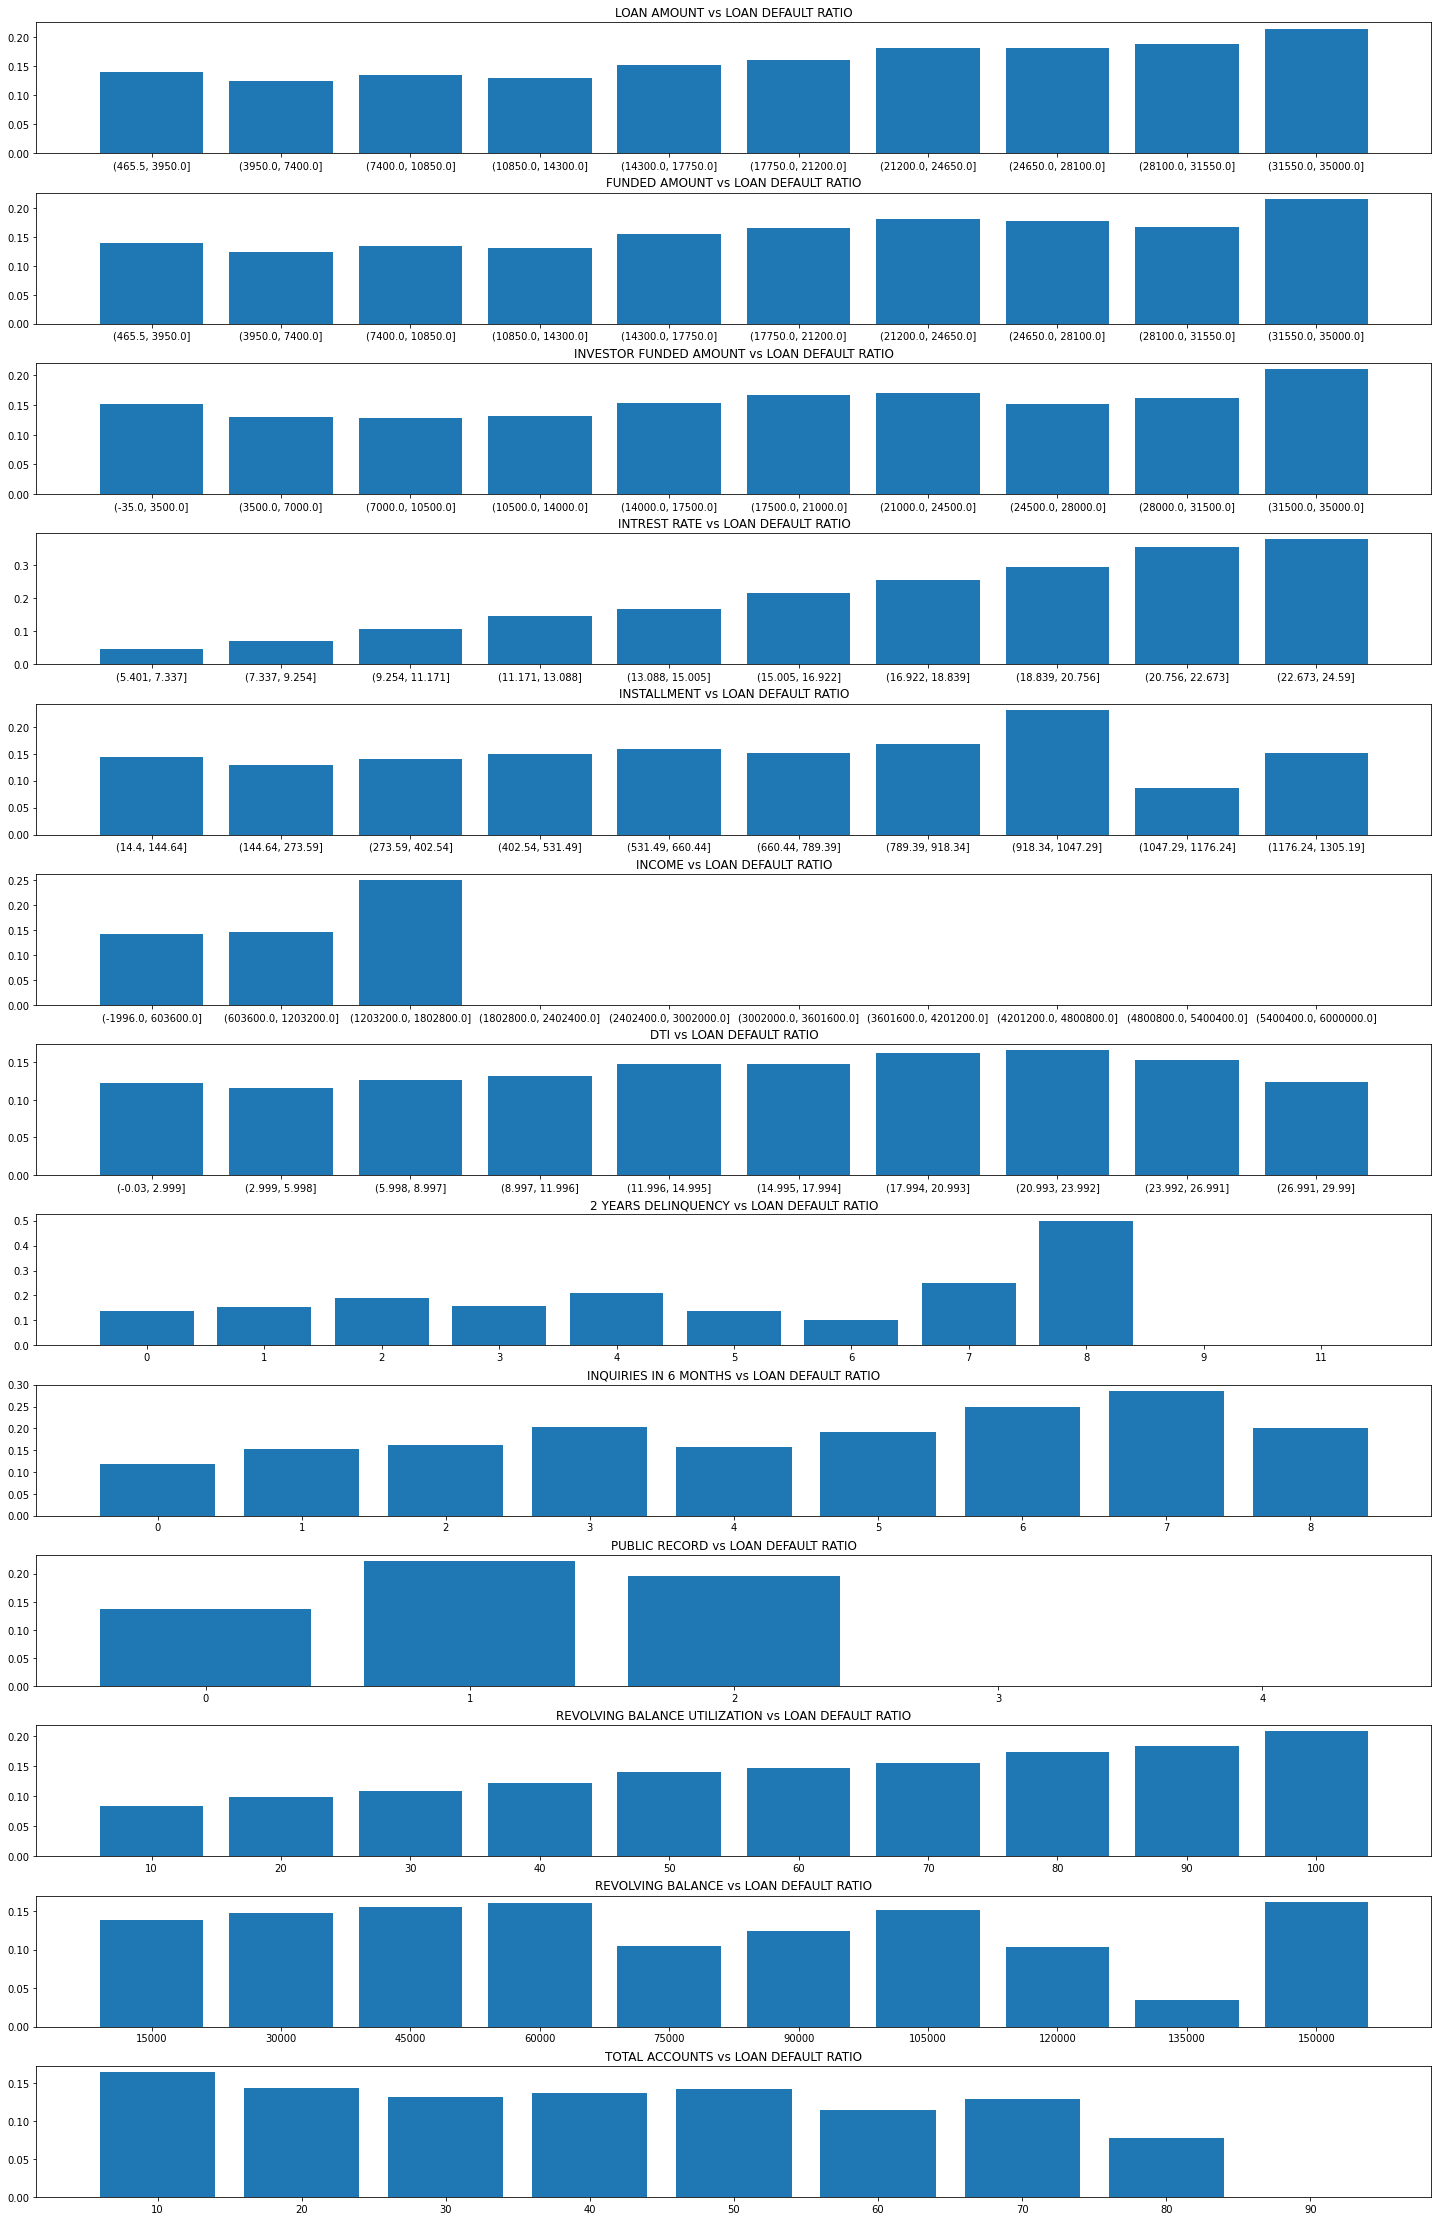

In [8]:
#create bins
loan_df['loan_amnt_bins']=pd.cut(loan_df['loan_amnt'],10)
loan_df['funded_amnt_bins']=pd.cut(loan_df['funded_amnt'],10)
loan_df['funded_amnt_inv_bins']=pd.cut(loan_df['funded_amnt_inv'],10)
loan_df['int_rate_bins']=pd.cut(loan_df['int_rate(percentage)'],10)
loan_df['installment_bins']=pd.cut(loan_df['installment'],10)
loan_df['annual_inc_bins']=pd.cut(loan_df['annual_inc'],10)
loan_df['dti_bins']=pd.cut(loan_df['dti'],10)
loan_df['revol_bal_bins']=pd.cut(loan_df['revol_bal'],
    bins=[0,15000,30000,45000,60000,75000,90000,105000,120000,135000,150000],
    labels=[15000,30000,45000,60000,75000,90000,105000,120000,135000,150000])
loan_df['revol_util_bins']=pd.cut(loan_df['revol_util(percentage)'],
    bins=[0,10,20,30,40,50,60,70,80,90,100],
    labels=[10,20,30,40,50,60,70,80,90,100])
loan_df['total_acc_bins']=pd.cut(loan_df['total_acc'],
    bins=[0,10,20,30,40,50,60,70,80,90],
    labels=[10,20,30,40,50,60,70,80,90])


#Plot continous attributes against loan default ratio
plt.figure(figsize=(25, 40))
grid = plt.GridSpec(13,1,wspace=0.3,hspace=0.3)

loan_default_vs_loan_amnt = loan_df[['loan_amnt_bins','loan_status']].groupby(['loan_amnt_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[0,0])
plt.bar( loan_default_vs_loan_amnt.index.astype('str'),loan_default_vs_loan_amnt.values)
plt.title('LOAN AMOUNT vs LOAN DEFAULT RATIO') 

loan_default_vs_funded_amnt = loan_df[['funded_amnt_bins','loan_status']].groupby(['funded_amnt_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[1,0])
plt.bar( loan_default_vs_funded_amnt.index.astype('str'),loan_default_vs_funded_amnt.values)
plt.title('FUNDED AMOUNT vs LOAN DEFAULT RATIO') 

loan_default_vs_funded_amnt_inv = loan_df[['funded_amnt_inv_bins','loan_status']].groupby(['funded_amnt_inv_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[2,0])
plt.bar( loan_default_vs_funded_amnt_inv.index.astype('str'),loan_default_vs_funded_amnt_inv.values)
plt.title('INVESTOR FUNDED AMOUNT vs LOAN DEFAULT RATIO') 

loan_default_vs_int_rate = loan_df[['int_rate_bins','loan_status']].groupby(['int_rate_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[3,0])
plt.bar( loan_default_vs_int_rate.index.astype('str'),loan_default_vs_int_rate.values)
plt.title('INTREST RATE vs LOAN DEFAULT RATIO') 

loan_default_vs_installment = loan_df[['installment_bins','loan_status']].groupby(['installment_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[4,0])
plt.bar( loan_default_vs_installment.index.astype('str'),loan_default_vs_installment.values)
plt.title('INSTALLMENT vs LOAN DEFAULT RATIO') 

loan_default_vs_income = loan_df[['annual_inc_bins','loan_status']].groupby(['annual_inc_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[5,0])
plt.bar( loan_default_vs_income.index.astype('str'),loan_default_vs_income.values)
plt.title('INCOME vs LOAN DEFAULT RATIO') 

loan_default_vs_dti = loan_df[['dti_bins','loan_status']].groupby(['dti_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[6,0])
plt.bar( loan_default_vs_dti.index.astype('str'),loan_default_vs_dti.values)
plt.title('DTI vs LOAN DEFAULT RATIO') 

loan_default_vs_delinq_2 = loan_df[['delinq_2yrs','loan_status']].groupby(['delinq_2yrs']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[7,0])
plt.bar( loan_default_vs_delinq_2.index.astype('str'),loan_default_vs_delinq_2.values)
plt.title('2 YEARS DELINQUENCY vs LOAN DEFAULT RATIO') 

loan_default_vs_inq_6m = loan_df[['inq_last_6mths','loan_status']].groupby(['inq_last_6mths']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[8,0])
plt.bar( loan_default_vs_inq_6m.index.astype('str'),loan_default_vs_inq_6m.values)
plt.title('INQUIRIES IN 6 MONTHS vs LOAN DEFAULT RATIO') 

loan_default_vs_pub_rec = loan_df[['pub_rec','loan_status']].groupby(['pub_rec']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[9,0])
plt.bar( loan_default_vs_pub_rec.index.astype('str'),loan_default_vs_pub_rec.values)
plt.title('PUBLIC RECORD vs LOAN DEFAULT RATIO') 

loan_default_vs_rev_util = loan_df[['revol_util_bins','loan_status']].groupby(['revol_util_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[10,0])
plt.bar( loan_default_vs_rev_util.index.astype('str'),loan_default_vs_rev_util.values)
plt.title('REVOLVING BALANCE UTILIZATION vs LOAN DEFAULT RATIO') 

loan_default_vs_rev_bal = loan_df[['revol_bal_bins','loan_status']].groupby(['revol_bal_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[11,0])
plt.bar( loan_default_vs_rev_bal.index.astype('str'),loan_default_vs_rev_bal.values)
plt.title('REVOLVING BALANCE vs LOAN DEFAULT RATIO') 

loan_default_vs_tot_acc = loan_df[['total_acc_bins','loan_status']].groupby(['total_acc_bins']).apply(lambda x: x[x.loan_status=='Charged Off'].size/x.size)
plt.subplot(grid[12,0])
plt.bar( loan_default_vs_tot_acc.index.astype('str'),loan_default_vs_tot_acc.values)
plt.title('TOTAL ACCOUNTS vs LOAN DEFAULT RATIO') 

plt.show()


            Loan Default Ratio increases with Loan Amount, interest rate, revolving balance utilization
            

>>### MULTIVARIATE ANALYSIS

<AxesSubplot:>

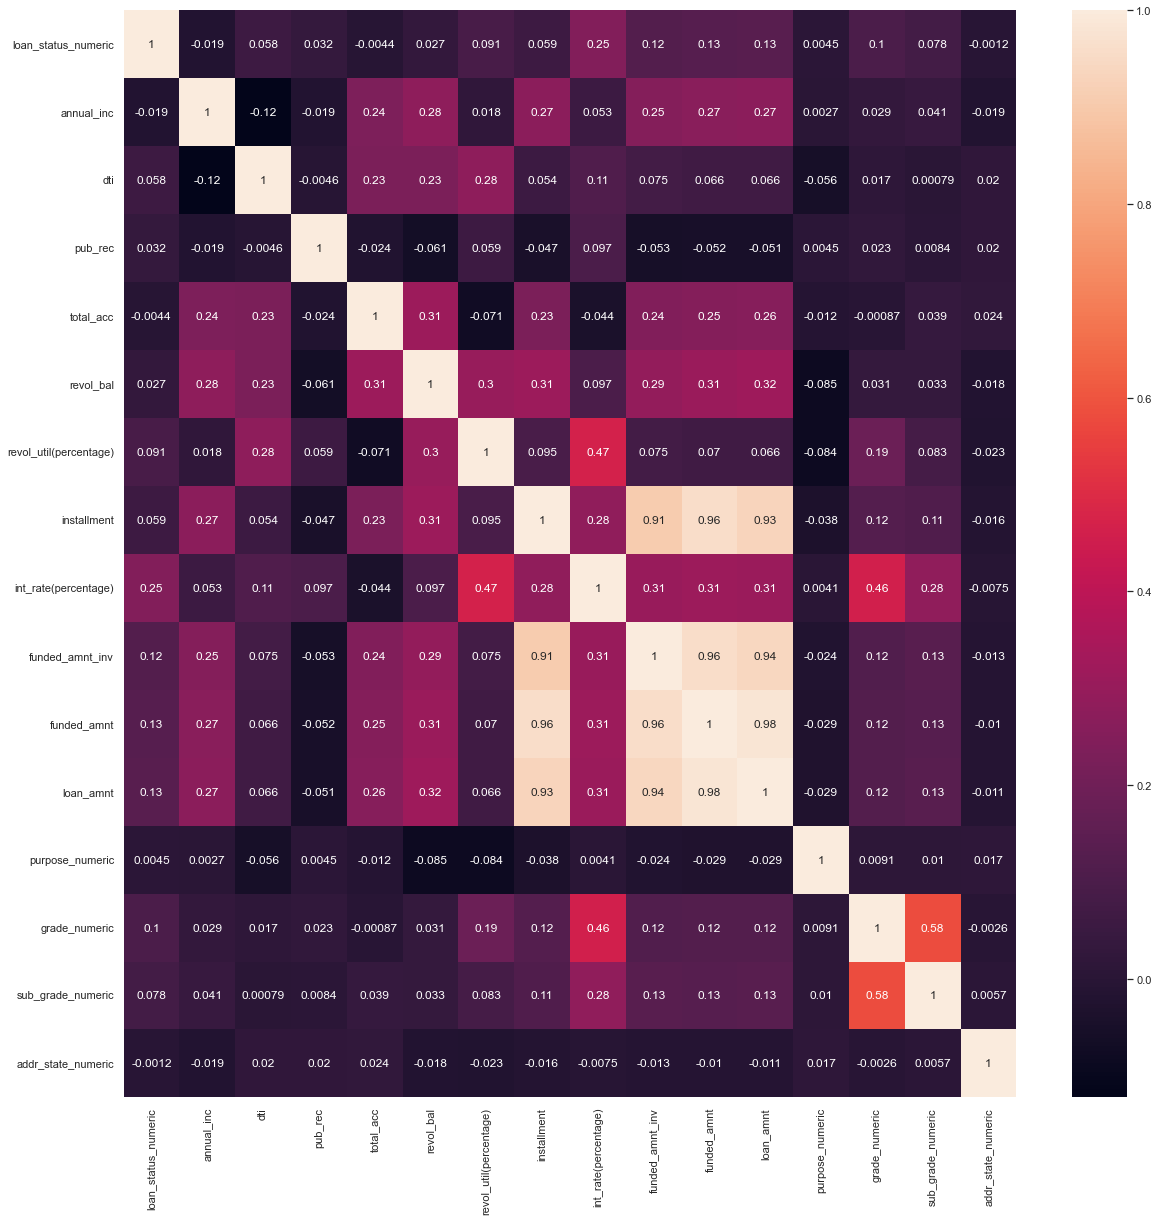

In [9]:
#Plot Covariance Matrix

loan_df['loan_status_numeric']=loan_df['loan_status'].factorize()[0]
loan_df['purpose_numeric']=loan_df['purpose'].factorize()[0]
loan_df['grade_numeric']=loan_df['grade'].factorize()[0]
loan_df['sub_grade_numeric']=loan_df['sub_grade'].factorize()[0]
loan_df['addr_state_numeric']=loan_df['addr_state'].factorize()[0]


params_for_corr=['loan_status_numeric','annual_inc','dti','pub_rec','total_acc','revol_bal',
    'revol_util(percentage)','installment','int_rate(percentage)','funded_amnt_inv','funded_amnt','loan_amnt','purpose_numeric','grade_numeric',
    'sub_grade_numeric','addr_state_numeric']
loan_correlation_param_df=loan_df[params_for_corr]
cov_mat=loan_correlation_param_df.corr()
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(cov_mat,annot=True)


            From the correlation heatmap interest rate, grade, subgrade and Revolving balance utilization has highest correlation with the loan_status

>>### CONCLUSION

            Most important parameters got loan default prediction are:
            * Loan Amount, Funded Amount, Investor Funded Amount
            * Interest Rate
            * Purpose
            * Term
            * Grade and Subgrade
            * Revolving Balance Utilization